In [49]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
with open('m2_df.pickle', 'rb') as file:
    df = pickle.load(file)

In [51]:
#df of where model 2 was left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Columns: 114 entries, id to ren_within 5 years
dtypes: datetime64[ns](1), float64(6), int64(17), object(1), uint8(89)
memory usage: 6.1+ MB


In [52]:
# Time to remove some outliers and see how that affects the model.

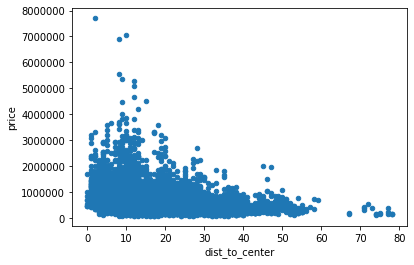

In [53]:
df.plot(kind = 'scatter', x = 'dist_to_center', y='price')

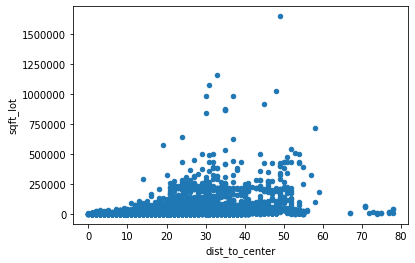

In [54]:
df.plot(kind = 'scatter', x = 'dist_to_center', y='sqft_lot')

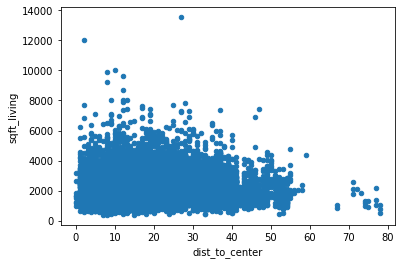

In [55]:
df.plot(kind = 'scatter', x = 'dist_to_center', y='sqft_living')

In [56]:
# living space vs distance to center, more spacious outliers in the city center.
# This could be because the small percentage of high earners compared to the general population live closer to the city center
# and can afford very large places.
# it would be interesting to create a living space to total lot space ratio and plot that against distance to city center.

In [57]:
columns = ['sqft_lot', 'dist_to_center', 'bedrooms', 'price', 'floors', 'sqft_living']
df[columns].describe()

,sqft_lot,dist_to_center,bedrooms,price,floors,sqft_living
count,2.142000e+04,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000
mean,1.512804e+04,18.708730,3.373950,5.407393e+05,1.495985,2083.132633
std,4.153080e+04,11.334154,0.925405,3.679311e+05,0.540081,918.808412
min,5.200000e+02,0.000000,1.000000,7.800000e+04,1.000000,370.000000
25%,5.040000e+03,9.000000,3.000000,3.225000e+05,1.000000,1430.000000
50%,7.614000e+03,17.000000,3.000000,4.500000e+05,1.500000,1920.000000
75%,1.069050e+04,26.000000,4.000000,6.450000e+05,2.000000,2550.000000
max,1.651359e+06,78.000000,33.000000,7.700000e+06,3.500000,13540.000000


In [58]:
# Based on visual observations of the data above I'll look at a subset of the dataset by excluding the below:
# remove
# anything over 3 floors
# price over 4 million
# homes over 50 miles of city center
# sqft_lot over 550000
# bedroom over 6
# sqft_living over 6000


df2 = df.loc[(df['sqft_lot'] <= 250000) 
         & (df['sqft_living'] <=5000) 
         & (df['floors'] <= 3) 
         & (df['dist_to_center'] <= 45) 
         & (df['price'] <= 3000000) 
         & (df['bedrooms'] <= 5)]
len(df2)

20433

In [59]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,neighb_lot_compared,dist_to_center,ren_10 - 15 years,ren_15 - 20 years,ren_20 - 25 years,ren_25 - 30 years,ren_30 - 35 years,ren_5 - 10 years,ren_over 35 years,ren_within 5 years
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,13,0,0,0,0,0,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,11,0,0,1,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1,15,0,0,0,0,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,11,0,0,0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1,22,0,0,0,0,0,0,1,0


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
    data = df2.copy()
    y = data['price']
    X = data.drop(['price', 'bedrooms', 'date','id','zipcode', 'has_basement', 'grade',
                   'yr_renovated', 'renovated', 'lat',
                   'long', 'sqft_living15', 'sqft_lot15', 'condition', 'yr_built', 
                   'zip_98019', 'zip_98034', 'zip_98038', 'zip_98022', 'zip_98019',
                   'zip_98014', 'bedrooms', 'grd_9'], axis = 1)
    # create data sets with an 80/20 split - train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squared Error:', mse_train)
    print('Test Mean Squared Error:', mse_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train Root Mean Squared Error:', rmse_train)
    print('Test Root Mean Squared Error:', rmse_test)

Train Mean Squared Error: 16759230170.733759
Test Mean Squared Error: 15521054941.729774
Train Root Mean Squared Error: 129457.44540478836
Test Root Mean Squared Error: 124583.52596442988


In [62]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1061.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:28:19   Log-Likelihood:            -2.6935e+05
No. Observations:               20433   AIC:                         5.389e+05
Df Residuals:                   20341   BIC:                         5.396e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms               1.943e+04   2115.559      9.186      0.000    1.53e+04    2.36e+04
sqft_living              116.4313      3.194     36.450      0.000     110.170     122.692
sqft_lot                   0.4628      0.045     10.203      0.000       0.374       0.552
floors                 -3.916e+04   2507.471    -15.617      0.000   -4.41e+04   -3.42e+04
waterfront              5.744e+05   1.26e+04     45.549      0.000     5.5e+05    5.99e+05
view                    1.282e+05   3554.940     36.065      0.000    1.21e+05    1.35e+05
sqft_above                49.2635      3.156     15.610      0.000      43.077      55.449
zip_98001               -4.96e+04   7980.899     -6.215      0.000   -6.52e+04    -3.4e+04
zip_98002              -1.877e+04   1.04e+04     -1.812      0.070   -3.91e+04    1529.021
zip_98003              -5.754e+04   8840.228     -6.509      0.000   -7.49e+04   -4.02e+04
zip_98004               4.683e+05   9734.825     48.110      0.000    4.49e+05    4.87e+05
zip_98005               1.144e+05   1.16e+04      9.890      0.000    9.17e+04    1.37e+05
zip_98006               7.946e+04   7798.235     10.189      0.000    6.42e+04    9.47e+04
zip_98007               5.719e+04   1.23e+04      4.639      0.000     3.3e+04    8.13e+04
zip_98008               7.124e+04   9075.991      7.849      0.000    5.34e+04     8.9e+04
zip_98010               7.008e+04   1.45e+04      4.830      0.000    4.16e+04    9.85e+04
zip_98011              -4.319e+04   1.03e+04     -4.199      0.000   -6.34e+04    -2.3e+04
zip_98023               -7.99e+04   7149.441    -11.175      0.000   -9.39e+04   -6.59e+04
zip_98024               7.936e+04    1.6e+04      4.946      0.000    4.79e+04    1.11e+05
zip_98027               4.912e+04   7460.607      6.584      0.000    3.45e+04    6.37e+04
zip_98028              -6.098e+04   9012.915     -6.766      0.000   -7.86e+04   -4.33e+04
zip_98029                1.08e+05   8121.029     13.296      0.000    9.21e+04    1.24e+05
zip_98030              -8.096e+04   8912.250     -9.084      0.000   -9.84e+04   -6.35e+04
zip_98031              -9.296e+04   8605.883    -10.802      0.000    -1.1e+05   -7.61e+04
zip_98032              -9.303e+04   1.23e+04     -7.562      0.000   -1.17e+05   -6.89e+04
zip_98033               1.434e+05   8230.494     17.425      0.000    1.27e+05     1.6e+05
zip_98039               8.404e+05   2.18e+04     38.618      0.000    7.98e+05    8.83e+05
zip_98040               2.687e+05      1e+04     26.759      0.000    2.49e+05    2.88e+05
zip_98042              -5.212e+04   6777.048     -7.691      0.000   -6.54e+04   -3.88e+04
zip_98045               1.233e+05   1.62e+04      7.620      0.000    9.16e+04    1.55e+05
zip_98052               6.625e+04   7000.063      9.464      0.000    5.25e+04  

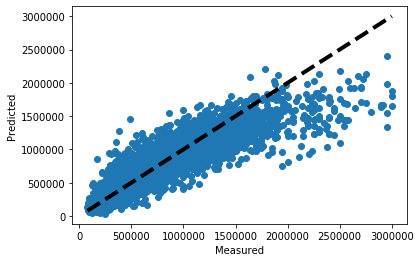

In [63]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import probplot
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

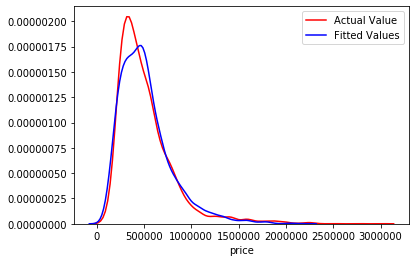

In [64]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

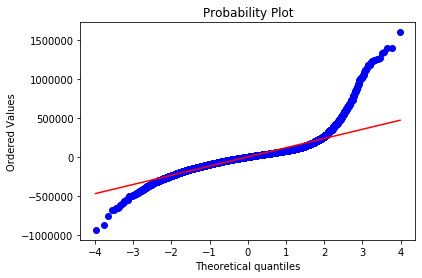

In [65]:
y_predicted = linreg.predict(X)
residuals = y - y_predicted

_ = probplot(residuals, plot=plt)

In [81]:
df3 = df.loc[(df['sqft_lot'] <= 250000) 
         & (df['sqft_living'] <=5000) 
         & (df['floors'] <= 3) 
         & (df['dist_to_center'] <= 45) 
         & (df['price'] <= 1500000) 
         & (df['bedrooms'] <= 6)]
percentage = (len(df3)/21420)*100
print(f'Dataset has {percentage} of cleaned dataset after removing outliers.')

Dataset has 94.83193277310924 of cleaned dataset after removing outliers.


In [67]:
df3['dist_to_center'].describe()

count    20084.000000
mean        18.254880
std         10.472914
min          0.000000
25%          9.000000
50%         17.000000
75%         26.000000
max         45.000000
Name: dist_to_center, dtype: float64

In [68]:
#more agressive removal, homes up to 1m and living space below 4000 sqft
df4 = df.loc[(df['sqft_lot'] <= 250000) 
         & (df['sqft_living'] <=4000) 
         & (df['floors'] <= 3) 
         & (df['dist_to_center'] <= 45) 
         & (df['price'] <= 1000000) 
         & (df['bedrooms'] <= 5)]
percentage = (len(df4)/21420)*100
print(f'Dataset has {percentage} of cleaned dataset after removing outliers.')

Dataset has 88.95891690009337 of cleaned dataset after removing outliers.


In [69]:
# df4 = df.loc[(df['sqft_lot'] <= 250000) 
#          & (df['sqft_living'] <=5500) 
#          & (df['floors'] <= 3) 
#          & (df['dist_to_center'] <= 50) 
#          & (df['price'] <= 1200000) 
#          & (df['bedrooms'] <= 5)]
# percentage = (len(df4)/21420)*100
# print(f'Dataset has {percentage} of cleaned dataset after removing outliers.')

In [70]:
outlier_df = df.loc[~((df['sqft_lot'] <= 250000) 
         & (df['sqft_living'] <=5500) 
         & (df['floors'] <= 3) 
         & (df['dist_to_center'] <= 50) 
         & (df['price'] <= 1200000) 
         & (df['bedrooms'] <= 5))]
percentage = (len(outlier_df)/21420)*100
print(f'Dataset has {percentage} of cleaned dataset after removing outliers.')

Dataset has 7.329598506069095 of cleaned dataset after removing outliers.



# Model 3-a containing 94% of the original data


In [99]:
 #outliers removed df3 contains 94% of the baseline data.
    
    data = df3.copy()
    y = data['price']
#     X = data.drop(['price', 'bedrooms', 'date','id','zipcode', 'has_basement', 'grade',
#                    'yr_renovated', 'renovated', 'lat',
#                    'long', 'sqft_living15', 'sqft_lot15', 'condition', 'yr_built', 
#                    'zip_98019', 'zip_98034', 'zip_98038', 'zip_98022', 'zip_98019', 'zip_98014',
#                    'zip_98144', 'neighb_lot_compared', 'bedrooms', 'grd_9'], axis = 1)
    X = data.drop(['price', 'bedrooms', 'date','id','zipcode', 'has_basement', 'grade',
               'yr_renovated', 'renovated', 'lat',
               'long', 'sqft_living15', 'sqft_lot15', 'condition', 'yr_built', 
               'zip_98019', 'zip_98034', 'zip_98038', 'zip_98022', 'zip_98019',
               'zip_98014', 'zip_98144', 'bedrooms', 'grd_9','grd_13'], axis = 1)
    # create data sets with an 80/20 split - train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squared Error:', mse_train)
    print('Test Mean Squared Error:', mse_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train Root Mean Squared Error:', rmse_train)
    print('Test Root Mean Squared Error:', rmse_test)

Train Mean Squared Error: 10126875923.136007
Test Mean Squared Error: 9783296039.061838
Train Root Mean Squared Error: 100632.38009277137
Test Root Mean Squared Error: 98910.54564131086


In [100]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1143.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:44:54   Log-Likelihood:            -2.6272e+05
No. Observations:               20313   AIC:                         5.256e+05
Df Residuals:                   20223   BIC:                         5.263e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms                1.25e+04   1642.714      7.607      0.000    9276.439    1.57e+04
sqft_living              100.8219      2.505     40.243      0.000      95.911     105.733
sqft_lot                   0.5000      0.035     14.183      0.000       0.431       0.569
floors                 -3.464e+04   1954.255    -17.726      0.000   -3.85e+04   -3.08e+04
waterfront              3.211e+05   1.25e+04     25.726      0.000    2.97e+05    3.46e+05
view                    1.018e+05   2822.228     36.081      0.000    9.63e+04    1.07e+05
sqft_above                44.3929      2.483     17.879      0.000      39.526      49.260
zip_98001              -5.508e+04   6217.685     -8.858      0.000   -6.73e+04   -4.29e+04
zip_98002              -3.112e+04   7950.226     -3.914      0.000   -4.67e+04   -1.55e+04
zip_98003              -6.467e+04   6854.231     -9.436      0.000   -7.81e+04   -5.12e+04
zip_98004               3.763e+05   7724.959     48.706      0.000    3.61e+05    3.91e+05
zip_98005               1.323e+05   8565.494     15.443      0.000    1.15e+05    1.49e+05
zip_98006               9.867e+04   5600.838     17.618      0.000    8.77e+04     1.1e+05
zip_98007               7.245e+04   9075.694      7.983      0.000    5.47e+04    9.02e+04
zip_98008               7.309e+04   6686.737     10.930      0.000       6e+04    8.62e+04
zip_98010               6.656e+04   1.13e+04      5.903      0.000    4.45e+04    8.87e+04
zip_98011              -3.106e+04   7674.062     -4.048      0.000   -4.61e+04    -1.6e+04
zip_98023              -8.052e+04   5568.040    -14.460      0.000   -9.14e+04   -6.96e+04
zip_98024                7.17e+04   1.26e+04      5.694      0.000     4.7e+04    9.64e+04
zip_98027               6.408e+04   5667.718     11.306      0.000     5.3e+04    7.52e+04
zip_98028              -5.037e+04   6578.443     -7.657      0.000   -6.33e+04   -3.75e+04
zip_98029               1.131e+05   6250.752     18.101      0.000    1.01e+05    1.25e+05
zip_98030              -8.363e+04   6884.122    -12.148      0.000   -9.71e+04   -7.01e+04
zip_98031              -9.474e+04   6615.971    -14.320      0.000   -1.08e+05   -8.18e+04
zip_98032              -9.965e+04   9480.666    -10.510      0.000   -1.18e+05   -8.11e+04
zip_98033               1.429e+05   5829.690     24.514      0.000    1.31e+05    1.54e+05
zip_98039               5.232e+05   2.71e+04     19.309      0.000     4.7e+05    5.76e+05
zip_98040               2.477e+05   7591.501     32.624      0.000    2.33e+05    2.63e+05
zip_98042               -5.57e+04   5272.397    -10.565      0.000    -6.6e+04   -4.54e+04
zip_98045               1.143e+05   1.25e+04      9.123      0.000    8.98e+04    1.39e+05
zip_98052               8.072e+04   4993.484     16.165      0.000    7.09e+04  

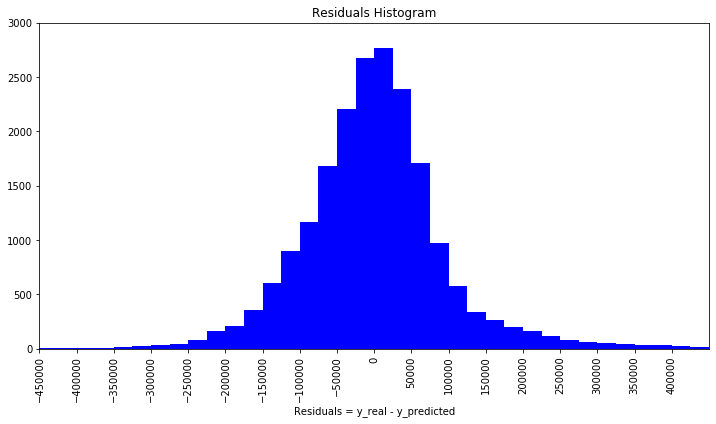

In [101]:
# Histogram for residuals
    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

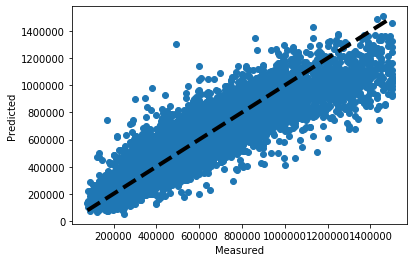

In [102]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

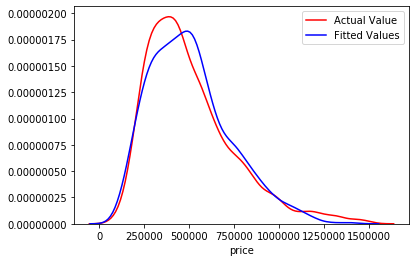

In [103]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)

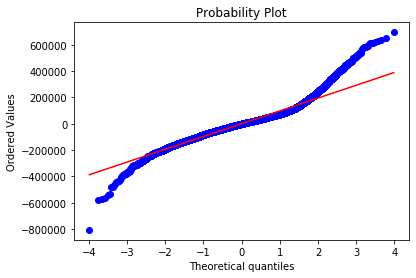

In [104]:
y_predicted = linreg.predict(X)
residuals = y - y_predicted

_ = probplot(residuals, plot=plt)


# Model 3-b containing 89% of the original dataset

In [77]:
 #outliers removed df3 contains 89% of the baseline data.
    
    data = df4.copy()
    y = data['price']

    X = data.drop(['price', 'bedrooms', 'date','id','zipcode', 'has_basement', 'grade',
               'yr_renovated', 'renovated', 'lat',
               'long', 'sqft_living15', 'sqft_lot15', 'condition', 'yr_built', 
               'zip_98019', 'zip_98034', 'zip_98038', 'zip_98022', 'zip_98019',
               'zip_98014', 'bedrooms', 'grd_9'], axis = 1)
    # create data sets with an 80/20 split - train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squared Error:', mse_train)
    print('Test Mean Squared Error:', mse_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('Train Root Mean Squared Error:', rmse_train)
    print('Test Root Mean Squared Error:', rmse_test)

Train Mean Squared Error: 6402928337.5469
Test Mean Squared Error: 6807902188.151437
Train Root Mean Squared Error: 80018.30001660183
Test Root Mean Squared Error: 82510.01265392847


In [78]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:30:01   Log-Likelihood:            -2.4228e+05
No. Observations:               19055   AIC:                         4.847e+05
Df Residuals:                   18965   BIC:                         4.854e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bathrooms               9160.4689   1412.334      6.486      0.000    6392.168    1.19e+04
sqft_living               88.6433      2.216     40.002      0.000      84.300      92.987
sqft_lot                   0.5344      0.030     17.893      0.000       0.476       0.593
floors                 -3.302e+04   1641.544    -20.113      0.000   -3.62e+04   -2.98e+04
waterfront               2.19e+05   1.24e+04     17.650      0.000    1.95e+05    2.43e+05
view                    7.562e+04   2503.736     30.203      0.000    7.07e+04    8.05e+04
sqft_above                48.7161      2.181     22.333      0.000      44.440      52.992
zip_98001               -5.98e+04   5023.842    -11.903      0.000   -6.96e+04      -5e+04
zip_98002              -3.907e+04   6501.262     -6.010      0.000   -5.18e+04   -2.63e+04
zip_98003              -6.336e+04   5570.035    -11.376      0.000   -7.43e+04   -5.24e+04
zip_98004               2.946e+05   7886.930     37.356      0.000    2.79e+05     3.1e+05
zip_98005               1.462e+05   7735.832     18.895      0.000    1.31e+05    1.61e+05
zip_98006               9.969e+04   5265.987     18.930      0.000    8.94e+04     1.1e+05
zip_98007               7.489e+04   7938.521      9.434      0.000    5.93e+04    9.04e+04
zip_98008               7.611e+04   5828.866     13.058      0.000    6.47e+04    8.75e+04
zip_98010               6.446e+04   9151.488      7.044      0.000    4.65e+04    8.24e+04
zip_98011              -2.054e+04   6541.202     -3.140      0.002   -3.34e+04   -7717.678
zip_98023              -7.954e+04   4516.776    -17.610      0.000   -8.84e+04   -7.07e+04
zip_98024               6.091e+04   1.03e+04      5.891      0.000    4.06e+04    8.12e+04
zip_98027               7.734e+04   4818.736     16.049      0.000    6.79e+04    8.68e+04
zip_98028              -3.951e+04   5721.402     -6.906      0.000   -5.07e+04   -2.83e+04
zip_98029               1.179e+05   5187.118     22.724      0.000    1.08e+05    1.28e+05
zip_98030              -8.419e+04   5602.502    -15.027      0.000   -9.52e+04   -7.32e+04
zip_98031              -9.421e+04   5403.737    -17.435      0.000   -1.05e+05   -8.36e+04
zip_98032              -1.034e+05   7719.156    -13.392      0.000   -1.19e+05   -8.82e+04
zip_98033               1.195e+05   5543.322     21.564      0.000    1.09e+05     1.3e+05
zip_98039               4.209e+05   3.63e+04     11.587      0.000     3.5e+05    4.92e+05
zip_98040               2.155e+05   7834.938     27.507      0.000       2e+05    2.31e+05
zip_98042              -5.842e+04   4265.601    -13.695      0.000   -6.68e+04   -5.01e+04
zip_98045                1.05e+05   1.02e+04     10.340      0.000    8.51e+04    1.25e+05
zip_98052               9.308e+04   4495.323     20.706      0.000    8.43e+04  

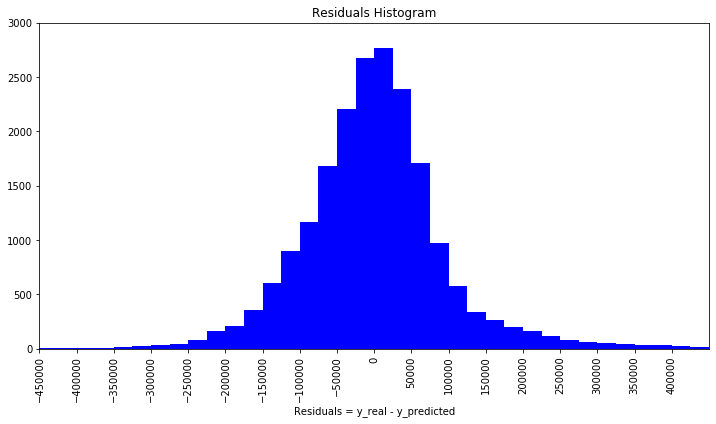

In [79]:
# Histogram for residuals
    color = 'Blue'
    plt.figure(figsize=(12,6))
    plt.hist(residuals, histtype = 'bar', range = (-500000, 500000),bins = 40, color=color)
    plt.ylim(0,3000)
    plt.xlim(-450000, 450000)
    plt.xticks((range(-450000,450000, 50000)), rotation = 'vertical')
    plt.xlabel('Residuals = y_real - y_predicted')
    plt.title('Residuals Histogram')
    plt.show()

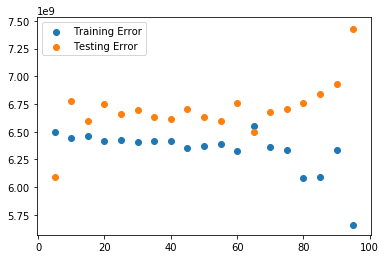

In [80]:
import random
from sklearn.metrics import mean_squared_error

random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [399]:
with open('m3_df.pickle', 'wb') as f:
    pickle.dump(df3, f)